# DATA PREPARATION

In [1]:
# ------------------------------------------
# INITIATION: PYTHON AND DISPLAY
# ------------------------------------------

# Import libraries
import pandas as pd #
import numpy as np
import ipywidgets as widgets
import matplotlib.pyplot as plt #charts
import seaborn as sns #charts
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler

from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import shapiro, jarque_bera

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance

from statsmodels.regression.quantile_regression import QuantReg
import statsmodels.formula.api as smf

import shap

from sklearn.linear_model import LassoCV



# For better visibility
from IPython.display import display, HTML

# Apply a no-wrap style to prevent text wrapping
display(HTML("""
<style>
.dataframe td { white-space: nowrap; }
</style>
"""))

# Set the option to display all columns
pd.set_option('display.max_columns', None)

# Set the option to display all rows
pd.set_option('display.max_rows', None)

# Set the float format to use a space as a thousands separator and a comma as a decimal separator
pd.set_option('display.float_format', lambda x: f'{x:,.2f}'.replace(',', ' ').replace('.', ','))

In [2]:
# ------------------------------------------
# FILE LOAD
# ------------------------------------------

# Read the Excel file into a DataFrame
df = pd.read_excel('Results/GRIP Analysis FILTER.xlsx', decimal=',')
display (df.head())

,2023,2022,2021,2020,2019,Name,GPW,Age (KRS),Business age,Business age?,Foreign branches,REGON,KRS,NIP,Legal form,PKD,PKD Opis,Sector 500,Sector,Country,Owner Type,S/J,Year,Sales,Gross Profit,Operating Profit,Net Profit,Depreciation,Export Sales,Employment,Staff costs,BS,Fixed Assets,Current Assets,Equity,Liabilities,Remove,Comments,PKD_1,PKD_1 Description,PKD_2,PKD_2 Description,Digital intensity,Export as % of Sales,ROS,ROA,ROE,P/F,BS_Strength,Human_Capital,GVA,Productivity,Hint25,Hint50,HGX,HGX%,SGrowth_2023_2019,LSGrowth_2023_2019,RSGrowth_2023_2019,LRSGrowth_2023_2019,Annualised_Growth,Drop_Sales_2020,Drop_Sales_2023,Drop_Sales_Both,SGrowth_2,SGrowth_1,GVAGrowth_2023_2019,EGrowth_2023_2019,LEGrowth_2023_2019,Annualised_EGrowth,Drop_Employment,EGrowth_3,EGrowth_2,PGrowth_2023_2019,Starting_Profit,Starting_INT,Starting_BS_Strength,Starting_Size_ln,Starting_Human_Capital,Starting_GVA,Starting_Prod
0,"2,00","2,00","3,00","2,00",2,"Jeronimo Martins Polska SA, Kostrzyn",NaN,1995,NaN,"2 004,00",NaN,630303023,222483,7791011327,SA,4719,Pozostała sprzedaż detaliczna prowadzona w nie...,Handel detaliczny,handel detaliczny,NaN,500,J,2019,"55 573 747,04","2 800 737,00","2 733 767,00","2 241 447,00","1 052 710,00","0,00","68 159,00","3 641 448,39","15 387 833,00","8 356 124,00","7 031 709,00","3 469 188,00","11 918 644,11",NaN,NaN,G,Wholesale and Retail Trade; Repair of Motor Ve...,47,"RETAIL TRADE, EXCEPT OF MOTOR VEHICLES",Medium-high,"0,00","0,04","0,15","0,65",F,"0,23","53,43","6 442 185,39","94,52",Exp<25,Exp<50,Decreased Export Intensity,"0,00","76,38","0,57","27,81","0,25","15,24",No,No,No,2.Stable,Growing,"4 394 364,76","16,33","0,15","3,85",No,2.Hiring,Hiring,"42,15","0,04","0,00","0,23","17,83","53,43","6 442 185,39","94,52"
1,"2,00","2,00","3,00","2,00",2,"Jeronimo Martins Polska SA, Kostrzyn",NaN,1995,NaN,"2 004,00",NaN,630303023,222483,7791011327,SA,4719,Pozostała sprzedaż detaliczna prowadzona w nie...,Handel detaliczny,handel detaliczny,NaN,500,J,2020,"61 216 804,38","3 172 358,00","3 025 772,20","2 443 206,00","1 061 103,00","0,00","70 750,00","4 118 504,95","17 223 467,72","8 296 193,33","8 927 274,39","3 672 480,00","13 550 987,33",NaN,NaN,G,Wholesale and Retail Trade; Repair of Motor Ve...,47,"RETAIL TRADE, EXCEPT OF MOTOR VEHICLES",Medium-high,"0,00","0,04","0,14","0,67",F,"0,21","58,21","7 290 862,95","103,05",Exp<25,Exp<50,Decreased Export Intensity,"0,00","76,38","0,57","27,81","0,25","15,24",No,No,No,2.Stable,Growing,"4 394 364,76","16,33","0,15","3,85",No,2.Hiring,Hiring,"42,15","0,04","0,00","0,23","17,83","53,43","6 442 185,39","94,52"
2,"2,00","2,00","3,00","2,00",2,"Jeronimo Martins Polska SA, Kostrzyn",NaN,1995,NaN,"2 004,00",NaN,630303023,222483,7791011327,SA,4719,Pozostała sprzedaż detaliczna prowadzona w nie...,Handel detaliczny,handel detaliczny,NaN,500,J,2021,"68 246 695,47","3 521 716,00","3 552 205,00","2 866 384,00","1 136 276,00","0,00","74 350,50","4 547 738,00","19 423 898,20","8 568 761,60","10 855 136,60","4 098 782,00","15 325 116,01",NaN,NaN,G,Wholesale and Retail Trade; Repair of Motor Ve...,47,"RETAIL TRADE, EXCEPT OF MOTOR VEHICLES",Medium-high,"0,00","0,04","0,15","0,70",F,"0,21","61,17","8 069 454,00","108,53",Exp<25,Exp<50,Decreased Export Intensity,"0,00","76,38","0,57","27,81","0,25","15,24",No,No,No,2.Stable,Growing,"4 394 364,76","16,33","0,15","3,85",No,2.Hiring,Hiring,"42,15","0,04","0,00","0,23","17,83","53,43","6 442 185,39","94,52"
3,"2,00","2,00","3,00","2,00",2,"Jeronimo Martins Polska SA, Kostrzyn",NaN,1995,NaN,"2 004,00",NaN,630303023,222483,7791011327,SA,4719,Pozostała sprzedaż detaliczna prowadzona w nie...,Handel detaliczny,handel detaliczny,NaN,500,J,2022,"85 034 775,00","4 109 337,00","4 254 158,00","3 414 175,00","1 207 337,60","0,00","77 726,70","5 186 427,00","23 866 577,00","10 897 620,00","12 968 957,00","4 653 067,00","19 213 509,11",NaN,NaN,G,Wholesale and Retail Trade; Repair of Motor Ve...,47,"RETAIL TRADE, EXCEPT OF MOTOR VEHICLES",Medium-high,"0,00","0,04",

In [3]:
# ------------------------------------------
# VARIABLE MANAGEMENT TEMPLATE
# ------------------------------------------

# 1. Load your full dataset (already cleaned)
df_master = df

# 🟨 ID & Metadata (for exclusion in all analysis)
id_columns = ['NIP','PKD', 'PKD Opis','PKD_1 Description', 'PKD_2 Description','2019', '2020', '2021', '2022', '2023']

# 🟥 Outcome-derived (Exclude from modeling but use in descriptive)
derived_outcomes = ['Opis','Sales','Gross Profit','Net Profit','Depreciation','Export Sales','Employment','Staff costs',
                    'BS','Fixed Assets','Current Assets','Equity','Liabilities',
                    'Export as % of Sales','ROS','ROA','ROE','BS_Strength','Human_Capital','GVA','Productivity',
                    'Hint25','Hint50','SGrowth_2023_2019', 'RSGrowth_2023_2019',
                    'Annualised_Growth','SGrowth_3','SGrowth_2','SGrowth_1',
                    'EGrowth_2023_2019','Annualised_EGrowth','EGrowth_3','EGrowth_2',
]

# ✅ Modeling variables (filtered dynamically)
all_exclusions = id_columns + derived_outcomes

# 3. Build filtered dataset for modeling
df_model = df_master.copy()
df_model = df_model[df_model['Year'] == 2023]
#df_model = df_model [df_model['2023'].notna()] #optional companies on the list in both 2019 and 2023
df_model = df_model.drop(columns=[col for col in all_exclusions if col in df_model.columns])

display(df_model.head())

,Name,GPW,Age (KRS),Business age,Business age?,Foreign branches,REGON,KRS,Legal form,Sector 500,Sector,Country,Owner Type,S/J,Year,Operating Profit,Remove,Comments,PKD_1,PKD_2,Digital intensity,P/F,HGX,HGX%,LSGrowth_2023_2019,LRSGrowth_2023_2019,Drop_Sales_2020,Drop_Sales_2023,Drop_Sales_Both,GVAGrowth_2023_2019,LEGrowth_2023_2019,Drop_Employment,PGrowth_2023_2019,Starting_Profit,Starting_INT,Starting_BS_Strength,Starting_Size_ln,Starting_Human_Capital,Starting_GVA,Starting_Prod
4,"Jeronimo Martins Polska SA, Kostrzyn",NaN,1995,NaN,"2 004,00",NaN,630303023,222483,SA,Handel detaliczny,handel detaliczny,NaN,500,J,2023,"5 121 150,49",NaN,NaN,G,47,Medium-high,F,Decreased Export Intensity,"0,00","0,57","0,25",No,No,No,"4 394 364,76","0,15",No,"42,15","0,04","0,00","0,23","17,83","53,43","6 442 185,39","94,52"
9,"PGE Polska Grupa Energetyczna GK SA, Lublin",SG),2007,"1 990,00","2 001,00",NaN,006227638,59307,SA,Prod. paliw i energii,energetyka,NaN,145,S,2023,"-4 055 000,00",NaN,NaN,M,70,High,P,Decreased Export Intensity,"-0,00","0,94","0,61",No,No,No,"2 373 000,00","0,01",Yes,"55,60","-0,10","0,40","0,56","17,44","111,08","483 000,00","11,52"
10,"MOL Polska sp. z o.o., Gdańsk",NaN,2001,NaN,NaN,NaN,190966301,6312,sp. z o.o.,NaN,paliwa,NaN,500,J,2023,"-9 662,00",NaN,NaN,G,47,Medium-high,F,Decreased Export Intensity,"0,00","-1,28","-1,61",Yes,Yes,Yes,"-255 503,00","-0,06",No,"-853,77","0,01","0,00","0,28","17,09","192,84","348 120,00","1 188,12"
19,"Eurocash SA GK, Komorniki",SG),2004,"1 993,00","2 004,00",NaN,631008941,213765,SA,Handel hurtowy,handel hurtowy,NaN,450,S,2023,"195 000,00",NaN,NaN,G,46,Medium-high,P,Decreased Export Intensity,"0,00","0,27","-0,06",Yes,Yes,Yes,"438 825,00","-0,17",Yes,"37,13","0,00","0,00","0,12","17,03","63,78","1 663 323,00","74,78"
23,"KGHM Polska Miedź SA GK, Lubin",SG),1961,"1 949,00","2 001,00",Tak,390021764,23302,SA,Górnictwo i hutnictwo,górnictwo i hutnictwo,NaN,415,S,2023,"-3 600 000,00",NaN,NaN,B,7,Low,P,Decreased Export Intensity,"-0,01","0,39","0,07",No,Yes,No,"-3 366 000,00","0,01",Yes,"-101,63","0,06","75,00","0,51","16,94","159,66","7 476 000,00","222,94"


In [4]:
# ------------------------------------------
# DATA PREPARATION (with winsor/trim option)
# ------------------------------------------


# STEP 2: DEFINE VARIABLES
target_raw = 'LSGrowth_2023_2019'
numeric_features = ['Starting_INT', 'Starting_BS_Strength', 'Starting_Size_ln', 'Starting_Profit']
categorical_vars = ['P/F', 'Sector','HGX'] # HGX removed

# Outlier handling parameters
percentile = 0.025
outlier_method = 'winsor'  # set to 'winsor' or 'trim'

# STEP 3: DROP MISSING VALUES (WITH COPY)
all_vars = numeric_features + categorical_vars + [target_raw]
before_drop = df_model["Name"].tolist()

df_clean = df_model.dropna(subset=all_vars).copy()
after_drop = df_clean["Name"].tolist()

dropped_companies = set(before_drop) - set(after_drop)
dropped_count = len(dropped_companies)

print(f"\nCompanies dropped due to missing values (Total: {dropped_count}):\n")
print("\n".join(sorted(dropped_companies)))

# ------------------------------------------
# STEP 4: OUTLIER HANDLING (winsor or trim)
# ------------------------------------------

def apply_outlier_handling(df, column, method='winsor', percentile=0.05):
    df = df.copy()
    lower = df[column].quantile(percentile)
    upper = df[column].quantile(1 - percentile)

    if method == 'winsor':
        flag_col = f"{column}_was_winsorized"
        win_col = f"{column}_win"
        df[flag_col] = (df[column] < lower) | (df[column] > upper)
        df[win_col] = np.clip(df[column], lower, upper)
        return df, win_col

    elif method == 'trim':
        df_trimmed = df[(df[column] >= lower) & (df[column] <= upper)].copy()
        return df_trimmed, column

    else:
        raise ValueError("Method must be 'winsor' or 'trim'")

# Apply the selected method
df_clean, target_variable = apply_outlier_handling(df_clean, target_raw, method=outlier_method, percentile=percentile)

# Print diagnostics
print(f"\nOutlier handling method: {outlier_method.upper()} (percentile = {percentile})\n")
print(df_clean[target_variable].describe(percentiles=[percentile, 0.25, 0.5, 0.75, 1 - percentile]))

if outlier_method == 'winsor':
    winsorized_count = df_clean[f"{target_raw}_was_winsorized"].sum()
    print(f"\nTotal number of companies winsorized: {winsorized_count}\n")
else:
    print(f"\nTotal number of companies after trimming: {df_clean.shape[0]}\n")


Companies dropped due to missing values (Total: 7):

Grupa Muszkieterów (Intermarché, Bricomarché), Swadzim
KPMG sp. z o.o. GK, Warszawa 
PSH Lewiatan GK, Włocławek
Pilkington (NSG Group w Polsce), Sandomierz
Polska Żegluga Morska PP GK, Szczecin
PwC sp. z o.o. GK, Warszawa 
ZPUE SA, Włoszczowa

Outlier handling method: WINSOR (percentile = 0.025)

count   1 803,00
mean        0,32
std         0,35
min        -0,67
2.5%       -0,67
25%         0,14
50%         0,32
75%         0,50
97.5%       1,09
max         1,09
Name: LSGrowth_2023_2019_win, dtype: float64

Total number of companies winsorized: 92



# OLS Regression


✅ Available Dummy Variables:
Index(['Foreign', 'Sector_chemia', 'Sector_energetyka',
       'Sector_górnictwo i hutnictwo', 'Sector_handel detaliczny',
       'Sector_handel hurtowy', 'Sector_media, telekomunkacja, IT',
       'Sector_motoryzacja', 'Sector_ochrona zdrowia i farmacja',
       'Sector_paliwa', 'Sector_produkcja', 'Sector_transport',
       'Sector_usługi', 'Sector_żywność', 'HGX_Increased Export Intensity'],
      dtype='object')

🔍 Trying to add interaction: Starting_INT * Starting_Size_ln
  - Starting_INT in X_numeric: True
  - Starting_Size_ln in X_numeric: True
  - Starting_INT in X_categorical: False
  - Starting_Size_ln in X_categorical: False
✅ Added to X_numeric: Starting_INT_Mult_Starting_Size_ln


<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     LSGrowth_2023_2019_win   R-squared:                       0.059
Model:                                OLS   Adj. R-squared:                  0.048
Method:                     Least Squares   F-statistic:                     5.557
Date:                    Mon, 03 Nov 2025   Prob (F-statistic):           3.91e-14
Time:                            09:36:21   Log-Likelihood:                -600.78
No. Observations:                    1803   AIC:                             1244.
Df Residuals:                        1782   BIC:                             1359.
Df Model:                              20                                         
Covariance Type:                nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  0.2658      0.026     10.326      0.000       0.215       0.316
Starting_INT                          -0.0172      0.009     -1.841      0.066      -0.035       0.001
Starting_BS_Strength                   0.0187      0.009      2.054      0.040       0.001       0.037
Starting_Size_ln                       0.0121      0.008      1.455      0.146      -0.004       0.028
Starting_Profit                        0.0245      0.009      2.777      0.006       0.007       0.042
Starting_INT_Mult_Starting_Size_ln    -0.0176      0.008     -2.066      0.039      -0.034      -0.001
Foreign                               -0.0455      0.017     -2.644      0.008      -0.079      -0.012
Sector_chemia                          0.0015      0.051      0.029      0.977      -0.099       0.102
Sector_energetyka                      0.3764      0.070      5.380      0.000       0.239       0.514
Sector_górnictwo i hutnictwo           0.0368      0.063      0.580      0.562      -0.088       0.161
Sector_handel detaliczny               0.0535      0.048      1.118      0.264      -0.040       0.147
Sector_handel hurtowy                  0.0003      0.035      0.009      0.993      -0.068       0.069
Sector_media, telekomunkacja, IT       0.0397      0.041      0.958      0.338      -0.042       0.121
Sector_motoryzacja                     0.0640      0.034      1.872      0.061      -0.003       0.131
Sector_ochrona zdrowia i farmacja      0.0815      0.044      1.842      0.066      -0.005       0.168
Sector_paliwa                          0.0035      0.049      0.071      0.943      -0.093       0.100
Sector_produkcja                       0.0147      0.031      0.474      0.636      -0.046       0.075
Sector_transport                       0.0582      0.042      1.390      0.165      -0.024       0.140
Sector_usługi                          0.0602      0.041      1.455      0.146      -0.021       0.141
Sector_żywność                         0.1623      0.034      4.712      0.000       0.095       0.230
HGX_Increased Export Intensity         0.0539      0.017      3.262      0.001       0.022       0.086
==============================================================================
Omnibus:                       61.795   Durbin-Watson:                   2.039
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               90.523
Skew:                          -0.330   Prob(JB):                     2.20e-20
Kurtosis:                       3.877   Cond. No.                         15.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly spec


🔍 Shapiro-Wilk Test (normality):
  Statistic = 0.9777
  p-value   = 0.0000

📦 Jarque-Bera Test (skew + kurtosis):
  Statistic = 90.5228
  p-value   = 0.0000


,Variable,VIF
0,const,"10,36"
1,Starting_INT,"1,36"
2,Starting_BS_Strength,"1,30"
3,Starting_Size_ln,"1,08"
4,Starting_Profit,"1,22"
5,Starting_INT_Mult_Starting_Size_ln,"1,06"
6,Foreign,"1,15"
7,Sector_chemia,"1,25"
8,Sector_energetyka,"1,17"
9,Sector_górnictwo i hutnictwo,"1,16"


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


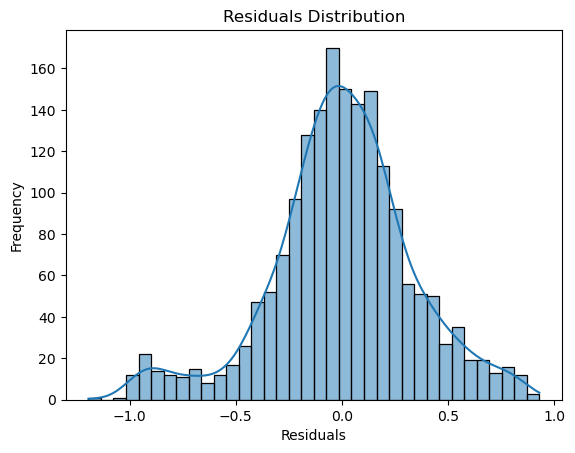

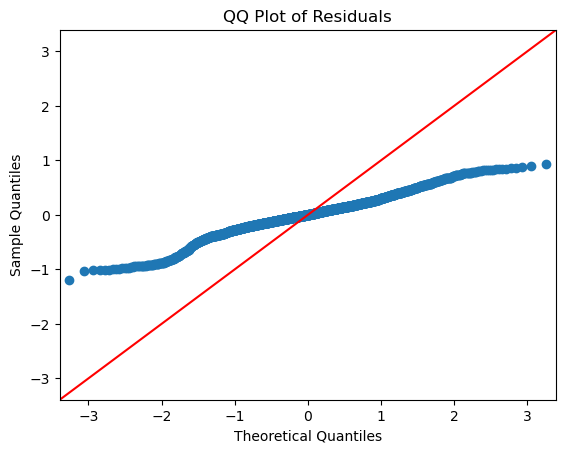

✅ Regression results successfully exported to 'Regression_Results'


In [5]:
# ------------------------------------------
# OLS REGRESSION ANALYSIS
# ------------------------------------------

# ADDITIONAL PARAMETERS
# STEP 1 - Interaction Terms
interaction_terms = [('Starting_INT','Starting_Size_ln')] # ('Foreign','Starting_Size_ln') 'HGX_Increased Export Intensity'

# STEP 2 - Dummy controlset-up

# OPTION A: MANUAL REFERENCE (full control)
reference_dict = {
    'P/F': 'P',
    'Sector': 'budownictwo',
'HGX': 'Decreased Export Intensity'} #     'HGX': 'Decreased Export Intensity',

# OPTION B: AUTOMATIC REFERENCE (first category found) – use only if needed
# reference_dict = {
#     var: df_clean[var].dropna().unique()[0] for var in categorical_vars
# }

rename_dict = {
    'P/F_F': 'Foreign',
}

# Step 2: Create all dummies
X_categorical = pd.get_dummies(df_clean[categorical_vars])

# Step 3: Drop reference dummy columns
for var, ref in reference_dict.items():
    col_to_drop = f"{var}_{ref}"
    if col_to_drop in X_categorical.columns:
        X_categorical = X_categorical.drop(columns=col_to_drop)

# Step 4: Rename columns for clarity
X_categorical = X_categorical.rename(columns=rename_dict)

# Print to verify the available dummy columns
print("\n✅ Available Dummy Variables:")
print(X_categorical.columns)

# STEP 5: STANDARDIZE NUMERIC VARIABLES
X_numeric = pd.DataFrame(
    StandardScaler().fit_transform(df_clean[numeric_features]),
    columns=numeric_features,
    index=df_clean.index
)

# STEP 5B: CLEAN COLUMN NAMES TO PREVENT HIDDEN ERRORS
X_numeric.columns = X_numeric.columns.str.strip()
X_categorical.columns = X_categorical.columns.str.strip()

# STEP 5C: DEFINE INTERACTION TERMS

interaction_terms = [(t1.strip(), t2.strip()) for t1, t2 in interaction_terms]

# STEP 5D: ADD INTERACTION TERMS WITH DIAGNOSTICS
for term1, term2 in interaction_terms:
    found_1_num = term1 in X_numeric.columns
    found_2_num = term2 in X_numeric.columns
    found_1_cat = term1 in X_categorical.columns
    found_2_cat = term2 in X_categorical.columns

    print(f"\n🔍 Trying to add interaction: {term1} * {term2}")
    print(f"  - {term1} in X_numeric: {found_1_num}")
    print(f"  - {term2} in X_numeric: {found_2_num}")
    print(f"  - {term1} in X_categorical: {found_1_cat}")
    print(f"  - {term2} in X_categorical: {found_2_cat}")

    # Get the variables
    if found_1_num:
        col1 = X_numeric[term1]
    elif found_1_cat:
        col1 = X_categorical[term1]
    else:
        print(f"⚠️ {term1} not found.")
        continue

    if found_2_num:
        col2 = X_numeric[term2]
    elif found_2_cat:
        col2 = X_categorical[term2]
    else:
        print(f"⚠️ {term2} not found.")
        continue

    # Compute interaction
    interaction_name = f"{term1}_Mult_{term2}"
    interaction_column = col1 * col2

    # Store in correct matrix
    if found_1_num and found_2_num:
        X_numeric[interaction_name] = interaction_column
        print(f"✅ Added to X_numeric: {interaction_name}")
    else:
        X_categorical[interaction_name] = interaction_column
        print(f"✅ Added to X_categorical: {interaction_name}")


# STEP 6: COMBINE FEATURES AND ADD CONSTANT
X_full = pd.concat([X_numeric, X_categorical], axis=1)
X_full = sm.add_constant(X_full).astype(float)

# STEP 7: DEFINE TARGET
y = df_clean[target_variable]

# STEP 8: FIT OLS REGRESSION MODEL
model = sm.OLS(y, X_full).fit()

# Extract coefficients as dataframe
coeff_df = pd.DataFrame({
    "Variable": model.params.index,
    "Coef": model.params.values,
    "Std Err": model.bse.values,
    "t": model.tvalues.values,
    "P>|t|": model.pvalues.values,
    "[0.025": model.conf_int()[0].values,
    "0.975]": model.conf_int()[1].values
})

# Display the full model summary
display(model.summary())

# STEP 8B: EXTRACT REGRESSION SUMMARY STATISTICS
summary_stats = {
    "Statistic": ["R-squared", "Adj. R-squared", "F-statistic", "Prob (F-statistic)", 
                  "Log-Likelihood", "AIC", "BIC", "No. Observations", "DF Residuals", "DF Model"],
    "Value": [
        model.rsquared,
        model.rsquared_adj,
        model.fvalue,
        model.f_pvalue,
        model.llf,
        model.aic,
        model.bic,
        model.nobs,
        model.df_resid,
        model.df_model
    ]
}
summary_df = pd.DataFrame(summary_stats)

# STEP 9: NORMALITY TESTS
residuals = model.resid.replace([np.inf, -np.inf], np.nan).dropna()
shapiro_test = shapiro(residuals)
jb_test = jarque_bera(residuals)

residual_stats = pd.DataFrame({
    "Test": ["Shapiro-Wilk", "Jarque-Bera"],
    "Statistic": [shapiro_test.statistic, jb_test.statistic],
    "p-value": [shapiro_test.pvalue, jb_test.pvalue]
})

print("\n🔍 Shapiro-Wilk Test (normality):")
print(f"  Statistic = {shapiro_test.statistic:.4f}")
print(f"  p-value   = {shapiro_test.pvalue:.4f}")

print("\n📦 Jarque-Bera Test (skew + kurtosis):")
print(f"  Statistic = {jb_test.statistic:.4f}")
print(f"  p-value   = {jb_test.pvalue:.4f}")

# STEP 10: CALCULATE VIF TO CHECK MULTICOLLINEARITY
vif_data = pd.DataFrame({
    "Variable": X_full.columns,
    "VIF": [variance_inflation_factor(X_full.values, i) for i in range(X_full.shape[1])]
})
display(vif_data)

# STEP 11: RESIDUALS DISTRIBUTION PLOT
sns.histplot(residuals, kde=True)
plt.title("Residuals Distribution")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

# STEP 12: QQ PLOT
sm.qqplot(residuals, line='45')
plt.title("QQ Plot of Residuals")
plt.show()

# STEP 13: COMBINE METADATA + SUMMARY INTO ONE TABLE
from datetime import datetime

now = datetime.now()

# Record outlier method and number of affected observations
if outlier_method == 'winsor':
    outlier_count = int(df_clean[f"{target_raw}_was_winsorized"].sum())
    outlier_description = f"WINSOR (percentile = {percentile})"
    outlier_note = f"{outlier_count} companies winsorized"
else:
    original_n = df_2023.dropna(subset=all_vars).shape[0]
    trimmed_n = df_clean.shape[0]
    outlier_count = original_n - trimmed_n
    outlier_description = f"TRIM (percentile = {percentile})"
    outlier_note = f"{outlier_count} companies trimmed"

# Prepare metadata
metadata_items = [
    ("Dep. Variable", model.model.endog_names),
    ("Model", type(model.model).__name__),
    ("Method", "Least Squares"),
    ("Date", now.strftime("%Y-%m-%d")),
    ("Time", now.strftime("%H:%M:%S")),
    ("No. Observations", model.nobs),
    ("Df Residuals", model.df_resid),
    ("Df Model", model.df_model),
    ("Covariance Type", model.cov_type),
    ("Outlier Handling", outlier_description),
    ("Affected Companies", outlier_note)
]

# Convert summary stats to tuples
summary_items = list(zip(summary_df["Statistic"], summary_df["Value"]))

# Combine both into one list
combined_summary = metadata_items + summary_items

# Create DataFrame
combined_df = pd.DataFrame(combined_summary, columns=["Item", "Value"])

# EXPORT TO EXCEL
with pd.ExcelWriter("Results/Regression_Results.xlsx") as writer:
    combined_df.to_excel(writer, sheet_name="Model_Summary", index=False)
    coeff_df.to_excel(writer, sheet_name="Model_Coefficients", index=False)
    vif_data.to_excel(writer, sheet_name="VIF", index=False)
    residual_stats.to_excel(writer, sheet_name="Residual_Tests", index=False)

print("✅ Regression results successfully exported to 'Regression_Results'")

In [6]:
X_with_dummies = pd.concat([df_clean[categorical_vars], X_categorical], axis=1)
print(X_with_dummies.head(10))

   P/F                 Sector                         HGX  Foreign  \
4    F      handel detaliczny  Decreased Export Intensity     True   
9    P             energetyka  Decreased Export Intensity    False   
10   F                 paliwa  Decreased Export Intensity     True   
19   P         handel hurtowy  Decreased Export Intensity    False   
23   P  górnictwo i hutnictwo  Decreased Export Intensity    False   
28   P                 paliwa  Decreased Export Intensity    False   
34   F      handel detaliczny  Increased Export Intensity     True   
39   P             energetyka  Decreased Export Intensity    False   
43   F            motoryzacja  Increased Export Intensity     True   
48   F  górnictwo i hutnictwo  Decreased Export Intensity     True   

    Sector_chemia  Sector_energetyka  Sector_górnictwo i hutnictwo  \
4           False              False                         False   
9           False               True                         False   
10          False  

In [9]:
# Exclude "Sector" from the list of categorical variables
categorical_vars_filtered = [var for var in categorical_vars if var != 'Sector']

# Combine numeric and filtered categorical variables
df_combined = pd.get_dummies(
    df_clean[numeric_features + categorical_vars_filtered + [target_variable]],
    drop_first=True
)
# Move the target column to the first position
cols = list(df_combined.columns)
if target_variable in cols:
    cols.insert(0, cols.pop(cols.index(target_variable)))
df_combined = df_combined[cols]

# Calculate the correlation matrix
correlation_matrix = df_combined.corr()

# Reorder the rows as well to place target at the top
correlation_matrix = correlation_matrix.reindex(index=cols, columns=cols)

# Display the correlation matrix
display(correlation_matrix)

# Flatten the correlation matrix and remove self-correlations
correlation_pairs = correlation_matrix.unstack().reset_index()
correlation_pairs.columns = ["Variable 1", "Variable 2", "Correlation"]

# Remove duplicate pairs (A-B and B-A)
correlation_pairs["Pair"] = correlation_pairs.apply(
    lambda row: "-".join(sorted([row["Variable 1"], row["Variable 2"]])), axis=1
)
correlation_pairs.drop_duplicates(subset="Pair", inplace=True)
correlation_pairs.drop(columns=["Pair"], inplace=True)

# Remove self-correlations
correlation_pairs = correlation_pairs[correlation_pairs["Variable 1"] != correlation_pairs["Variable 2"]]

# Sort by absolute correlation value
top_10_correlations = correlation_pairs.reindex(
    correlation_pairs.Correlation.abs().sort_values(ascending=False).index
).head(10)


display(top_10_correlations)

from openpyxl import load_workbook
import pandas as pd

output_path = "Results/Regression_Results.xlsx"

# Make sure the file exists first
book = load_workbook(output_path)

with pd.ExcelWriter(output_path, engine="openpyxl", mode="a", if_sheet_exists="replace") as writer:
    # Just use the context manager, no need to set writer.book anymore
    correlation_matrix.to_excel(writer, sheet_name="Correlation_Matrix", float_format="%.4f")
    top_10_correlations.to_excel(writer, sheet_name="Top_10_Correlations", index=False)

print("Sheets added to 'Regression_Results.xlsx' successfully!")


,LSGrowth_2023_2019_win,Starting_INT,Starting_BS_Strength,Starting_Size_ln,Starting_Profit,P/F_P,HGX_Increased Export Intensity
LSGrowth_2023_2019_win,"1,00","-0,05","0,07","0,05","0,07","0,06","0,06"
Starting_INT,"-0,05","1,00","0,20","-0,01","0,07","-0,30","0,07"
Starting_BS_Strength,"0,07","0,20","1,00","-0,05","0,38","-0,06","0,05"
Starting_Size_ln,"0,05","-0,01","-0,05","1,00","-0,04","-0,10","0,02"
Starting_Profit,"0,07","0,07","0,38","-0,04","1,00","-0,08","0,02"
P/F_P,"0,06","-0,30","-0,06","-0,10","-0,08","1,00","-0,10"
HGX_Increased Export Intensity,"0,06","0,07","0,05","0,02","0,02","-0,10","1,00"


,Variable 1,Variable 2,Correlation
18,Starting_BS_Strength,Starting_Profit,"0,38"
12,Starting_INT,P/F_P,"-0,30"
9,Starting_INT,Starting_BS_Strength,"0,20"
26,Starting_Size_ln,P/F_P,"-0,10"
41,P/F_P,HGX_Increased Export Intensity,"-0,10"
33,Starting_Profit,P/F_P,"-0,08"
13,Starting_INT,HGX_Increased Export Intensity,"0,07"
2,LSGrowth_2023_2019_win,Starting_BS_Strength,"0,07"
4,LSGrowth_2023_2019_win,Starting_Profit,"0,07"
11,Starting_INT,Starting_Profit,"0,07"


Sheets added to 'Regression_OLS_Results.xlsx' successfully!


In [ ]:
df_clean[['Starting_GVA', 'Starting_Profit']].corr()

In [ ]:
# TRAINING AND TESTING 
# (checking how well the model generalizes to new data — a key step in any predictive analysis.)

from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import r2_score, mean_squared_error

# STEP A: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_full, y, test_size=0.3, random_state=42)

# STEP B: Fit OLS Model on Training Data
model_train = sm.OLS(y_train, X_train).fit()

# STEP C: Make Predictions on Testing Data
y_test_pred = model_train.predict(X_test)

# STEP D: Evaluate Model Performance
test_r2 = r2_score(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

# Display Test Performance
print(f"Test R² Score: {test_r2:.4f}")
print(f"Test Mean Squared Error: {test_mse:.4f}")
